In [1]:
import torch
import numpy as np
from utils import DataLoader, MultiFeatureDataset, collate_fn
from models import BertRegressionModel
from torch.utils.data import DataLoader as TorchDataLoader
from utils.metrics import evaluate_model
from matplotlib import pyplot as plt

In [2]:
import logging
logging.basicConfig(level=logging.INFO)

In [3]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [4]:
dl = DataLoader(
    benchmark="benchmark_2",
    split=None,
    embedding="bert_cls", 
    max_len=64,
    include_axes=True,
    shuffle_axes=False,  
    normalization="zscore"
)

INFO:utils.dataloader:Initializing DataLoader...
INFO:utils.dataloader:Using device: cuda
INFO:utils.dataloader:Loading dataset for benchmark benchmark_2 with split None
INFO:utils.dataloader:No split specified; loading all splits (train, validation, test).
INFO:utils.dataloader:Dataset loaded successfully.
INFO:utils.dataloader:Initializing embedding for method bert_cls...
INFO:utils.dataloader:Initialized BERT model and tokenizer.
INFO:utils.dataloader:Embedding resources initialized.


In [5]:
train_dataset = MultiFeatureDataset(dl.dataset["train"], tokenizer, max_len=64)
valid_dataset = MultiFeatureDataset(dl.dataset["validation"], tokenizer, max_len=64)
test_dataset  = MultiFeatureDataset(dl.dataset["test"], tokenizer, max_len=64)

In [6]:
train_loader = TorchDataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)
valid_loader = TorchDataLoader(valid_dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)
test_loader  = TorchDataLoader(test_dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

Device: cuda


In [8]:
grid_params = {"dropout": [0, 0.2, 0.4]}
lr = 1e-4
epochs = 10

In [9]:
dummy_model = BertRegressionModel(dropout=0.1)

INFO:models.bert_regression:BERT Regression model built with dropout=0.1 and regressor input dim=6912


INFO:models.bert_regression:Grid search: dropout=0, lr=0.0001
INFO:models.bert_regression:BERT Regression model built with dropout=0 and regressor input dim=6912
INFO:models.bert_regression:BERT Regressor Epoch 1/10 - Train Loss: 253.2713 - Val Loss: 52.9062
INFO:models.bert_regression:BERT Regressor Epoch 2/10 - Train Loss: 67.5711 - Val Loss: 52.2143
INFO:models.bert_regression:BERT Regressor Epoch 3/10 - Train Loss: 64.4842 - Val Loss: 55.5045
INFO:models.bert_regression:BERT Regressor Epoch 4/10 - Train Loss: 67.0001 - Val Loss: 56.1360
INFO:models.bert_regression:BERT Regressor Epoch 5/10 - Train Loss: 64.9371 - Val Loss: 56.0507
INFO:models.bert_regression:BERT Regressor Epoch 6/10 - Train Loss: 64.7883 - Val Loss: 55.6344
INFO:models.bert_regression:BERT Regressor Epoch 7/10 - Train Loss: 63.9349 - Val Loss: 57.7026
INFO:models.bert_regression:BERT Regressor Epoch 8/10 - Train Loss: 63.8245 - Val Loss: 53.3574
INFO:models.bert_regression:BERT Regressor Epoch 9/10 - Train Loss: 6

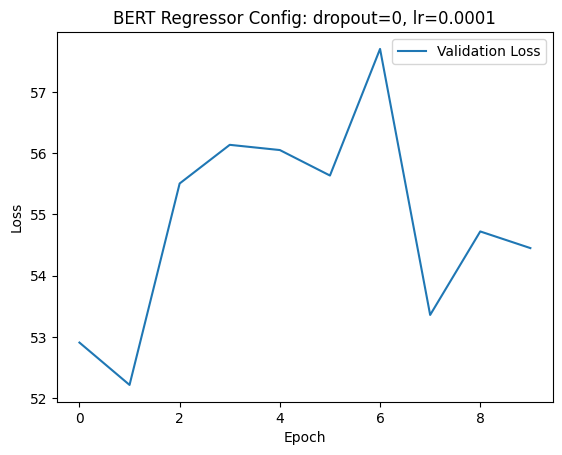

INFO:models.bert_regression:Grid search: dropout=0.2, lr=0.0001
INFO:models.bert_regression:BERT Regression model built with dropout=0.2 and regressor input dim=6912
INFO:models.bert_regression:BERT Regressor Epoch 1/10 - Train Loss: 240.1468 - Val Loss: 53.0135
INFO:models.bert_regression:BERT Regressor Epoch 2/10 - Train Loss: 65.2965 - Val Loss: 56.0800
INFO:models.bert_regression:BERT Regressor Epoch 3/10 - Train Loss: 63.0832 - Val Loss: 56.7986
INFO:models.bert_regression:BERT Regressor Epoch 4/10 - Train Loss: 60.8003 - Val Loss: 53.4825
INFO:models.bert_regression:BERT Regressor Epoch 5/10 - Train Loss: 64.8609 - Val Loss: 59.6891
INFO:models.bert_regression:BERT Regressor Epoch 6/10 - Train Loss: 65.6813 - Val Loss: 55.3859
INFO:models.bert_regression:BERT Regressor Epoch 7/10 - Train Loss: 64.3699 - Val Loss: 53.0755
INFO:models.bert_regression:BERT Regressor Epoch 8/10 - Train Loss: 65.0723 - Val Loss: 55.4783
INFO:models.bert_regression:BERT Regressor Epoch 9/10 - Train Los

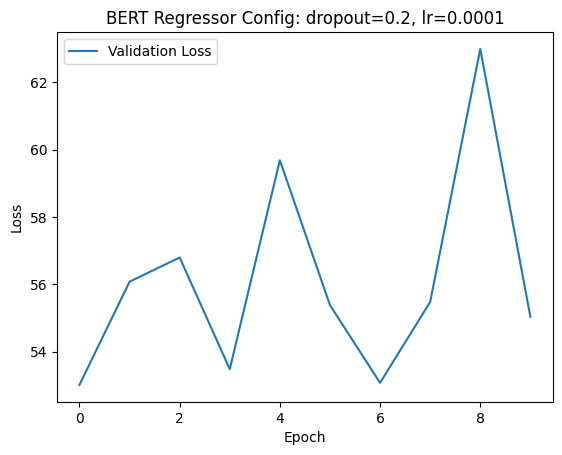

INFO:models.bert_regression:Grid search: dropout=0.4, lr=0.0001
INFO:models.bert_regression:BERT Regression model built with dropout=0.4 and regressor input dim=6912
INFO:models.bert_regression:BERT Regressor Epoch 1/10 - Train Loss: 268.9023 - Val Loss: 53.1826
INFO:models.bert_regression:BERT Regressor Epoch 2/10 - Train Loss: 66.1153 - Val Loss: 57.6410
INFO:models.bert_regression:BERT Regressor Epoch 3/10 - Train Loss: 71.4287 - Val Loss: 53.1248
INFO:models.bert_regression:BERT Regressor Epoch 4/10 - Train Loss: 64.9504 - Val Loss: 53.4115
INFO:models.bert_regression:BERT Regressor Epoch 5/10 - Train Loss: 65.1299 - Val Loss: 53.8843
INFO:models.bert_regression:BERT Regressor Epoch 6/10 - Train Loss: 63.3127 - Val Loss: 53.1242
INFO:models.bert_regression:BERT Regressor Epoch 7/10 - Train Loss: 66.0421 - Val Loss: 53.7533
INFO:models.bert_regression:BERT Regressor Epoch 8/10 - Train Loss: 66.0927 - Val Loss: 57.2944
INFO:models.bert_regression:BERT Regressor Epoch 9/10 - Train Los

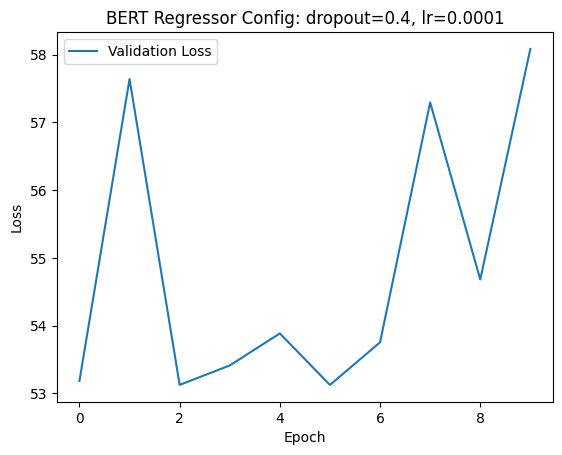

Best Hyperparameters: {'dropout': 0, 'lr': 0.0001}


In [10]:
best_model, best_params, train_losses, valid_losses = dummy_model.grid_search(
    train_loader, valid_loader, grid_params=grid_params, epochs=epochs, lr=lr, device=device
)

print("Best Hyperparameters:", best_params)

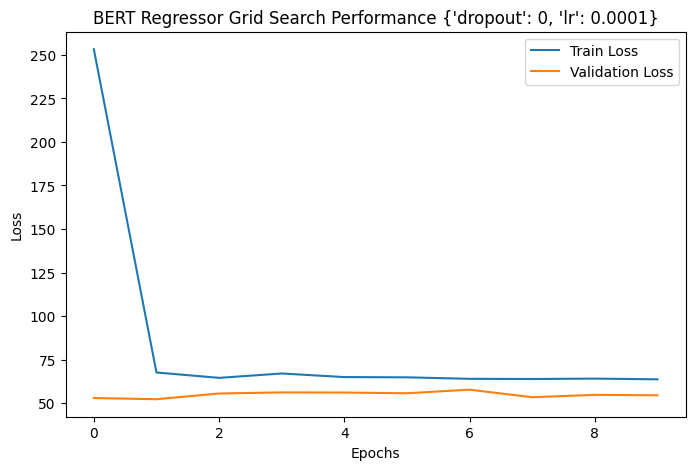

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(valid_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"BERT Regressor Grid Search Performance {best_params}")
plt.legend()
plt.savefig("plots/benchmark_2/bert_regressor_grid_search.pdf")
plt.show()

In [12]:
best_model.eval()
with torch.no_grad():
    preds_list = []
    for batch in test_loader:
        preds = best_model(batch["input_ids"], batch["attention_masks"])
        preds_list.append(preds.cpu().numpy())
    test_preds = np.vstack(preds_list)

y_test = np.array([sample["targets"].numpy() for sample in test_dataset])

In [9]:
mse, mae, r2, nll, crps, pearson_corr, spearman_corr = evaluate_model(y_test, test_preds)
print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}, NLL: {nll:.4f}, CRPS: {crps:.4f}, Pearson: {pearson_corr:.4f}, Spearman: {spearman_corr:.4f}")

MSE: 68.1507, MAE: 4.6741, R2: -0.1122, NLL: 3.5299, CRPS: 4.6741, Pearson: -0.2198, Spearman: -0.2407


In [14]:
save_path = "baseline_weights/benchmark_2/bert_regressor.pth"
best_model.save(save_path)

INFO:models.bert_regression:BERT Regressor model saved to baseline_weights/benchmark_2/bert_regressor.pth
